In [5]:
import pandas as pd
import seaborn as sns

In [6]:
res_file = "n_pos=200_time_q=0.9_data_path=ml-1m.zip_max_fails=2.csv"

In [7]:
res = pd.read_csv(res_file)

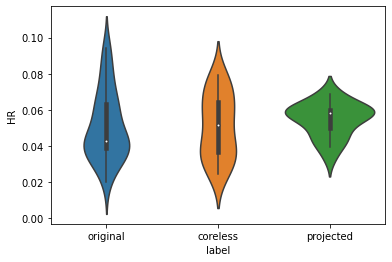

In [8]:
sns.violinplot(data=res, x='label', y='HR');

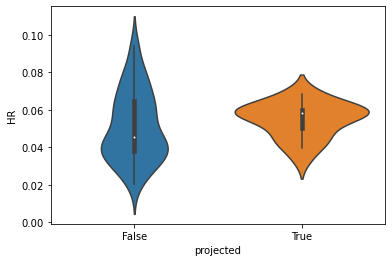

In [12]:
sns.violinplot(data=res, x='projected', y='HR');

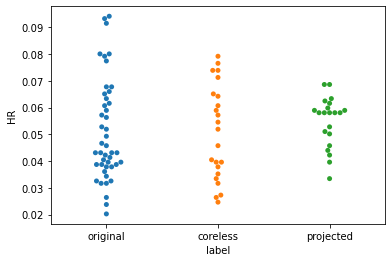

In [9]:
sns.swarmplot(data=res, x='label', y='HR');

## Experiment Completion

In [10]:
from polara.evaluation.pipelines import random_grid
from hooi import valid_mlrank

grid = dict(
        r_user = [24, 32, 48, 64, 96, 128, 192],
        r_item = [24, 32, 48, 64, 96, 128, 192],
        r_pos = [4, 8, 16, 24],
        projected = [True, False],
        update_order = [(2, 1, 0), (1, 2, 0), (0, 1, 2), (1, 0, 2), (2, 0, 1), (0, 2, 1)]
    )

def skip_config(config):
    *mlrank, projected, update_order = config
    if not valid_mlrank(mlrank):
        return True
    if projected and update_order[-1] != 0:
        return True    
    

param_grid, param_names = random_grid(grid, n=0, skip_config=skip_config)

In [11]:
print(f'{res.shape[0]/ len(param_grid):.2%}')

6.11%
